In [4]:
%cd C:\Users\giftoff\Data_Projects

C:\Users\giftoff\Data_Projects


In [90]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
import re

In [6]:
data = pd.read_csv("train.csv")

def convert(data):
    X = data[["Sex", "Age"]]
    le = preprocessing.LabelEncoder()
    X = data.Sex
    X.shape
    X = pd.DataFrame(X)
    sex2 = X.apply(le.fit_transform)
    imp = Imputer(strategy="mean")
    age = data.Age
    age = age[:, np.newaxis]
    age2 = imp.fit_transform(age)
    X["Age"] = age2
    X["Sex"] = sex2
    return X

In [99]:
X = convert(data)

In [16]:
y = data["Survived"]

In [86]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [87]:
model.fit(X,y)

GaussianNB(priors=None)

In [89]:
test = pd.read_csv("test.csv")

In [101]:
Xtest = convert(test)

In [104]:
Surv = model.predict(Xtest)

In [106]:
pas = test.PassengerId

In [115]:
pd.Series(Surv, index=pas, name="Survived").to_csv("Survived.csv")


In [40]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
total = data.isnull().sum().sort_values(ascending=False)

In [21]:
perc = (data.isnull().sum()/len(data.Cabin)).sort_values(ascending=False)

In [22]:
perc

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

In [24]:
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [31]:
missing_data = pd.concat([total, perc],axis=1,keys=["total","perc"])

In [32]:
missing_data.head()

,total,perc
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000


In [34]:
missing_data[missing_data["total"] > 1].index

Index(['Cabin', 'Age', 'Embarked'], dtype='object')

In [43]:
missing_data.nlargest(2,"total")["total"].index[0]
data = data.drop(data.loc[data.Age.isnull()].index)

In [73]:
from sklearn.preprocessing import StandardScaler
age_scaled = StandardScaler().fit_transform(data.Age[:, np.newaxis])
high_end = age_scaled[age_scaled[:,0].argsort()][-10:]
high_end

array([[ 2.43180638],
       [ 2.43180638],
       [ 2.50069435],
       [ 2.77624626],
       [ 2.77624626],
       [ 2.81069025],
       [ 2.84513424],
       [ 2.84513424],
       [ 3.05179817],
       [ 3.46512604]])

In [46]:
data["Age Scaled"] = age_scaled

In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530377
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571831
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254825
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.365167
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.365167


In [48]:
data.Age.isnull().sum()

0

In [52]:
data.isnull().sum().max()

529

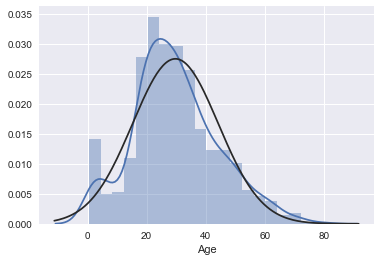

In [78]:
from scipy.stats import norm
sns.distplot(data.Age, fit=norm)

In [79]:
data["log_age"] = np.log(data.Age)

In [80]:
data["log_age"].head()

0    3.091042
1    3.637586
2    3.258097
3    3.555348
4    3.555348
Name: log_age, dtype: float64

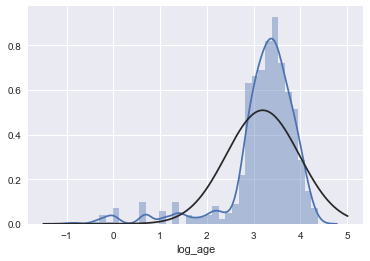

In [81]:
sns.distplot(data.log_age, fit=norm)

In [87]:
type(None)

NoneType

In [91]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [92]:
data["Title"] = data.Name.apply(get_title)

In [93]:
data.Title.head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object